# Dijkstra's Algorithm

## Sample Graph


![Graph](https://www.geeksforgeeks.org/wp-content/uploads/Fig-11.jpg)

In [1]:
# Python program for Dijkstra's single 
# source shortest path algorithm. The program is 
# for adjacency matrix representation of the graph
  
# https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/

# Library for INT_MAX
import sys
  
class Graph():
  
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
  
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
  
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
  
        # Initialize minimum distance for next node
        min = sys.maxsize
  
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u
  
        return min_index
  
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
  
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
  
        # for _ in range(self.V):
        while not all(sptSet): # this check would need to be used on set data type to be efficent not list
  
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # x is always equal to src in first iteration
            x = self.minDistance(dist, sptSet)
  
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[x] = True
  
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                        dist[y] > dist[x] + self.graph[x][y]:
                    dist[y] = dist[x] + self.graph[x][y]
  
        self.printSolution(dist)

  
# This code is contributed by Divyanshu Mehta fixed by VS

## Sample Graph Solved


In [2]:
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
            [4, 0, 8, 0, 0, 0, 0, 11, 0],
            [0, 8, 0, 7, 0, 4, 0, 0, 2],
            [0, 0, 7, 0, 9, 14, 0, 0, 0],
            [0, 0, 0, 9, 0, 10, 0, 0, 0],
            [0, 0, 4, 14, 10, 0, 2, 0, 0],
            [0, 0, 0, 0, 0, 2, 0, 1, 6],
            [8, 11, 0, 0, 0, 0, 1, 0, 7],
            [0, 0, 2, 0, 0, 0, 6, 7, 0]
            ]
# find solution from vertex 0 to all other vertices
g.dijkstra(0)

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 14


In [3]:
sys.maxsize # 64bit signed infinity :)

9223372036854775807

In [5]:
2**63-1

9223372036854775807

## Finding shortest path from other vertices

In [6]:

dijkstra(4)

Vertex 	Distance from Source
0 	 21
1 	 22
2 	 14
3 	 9
4 	 0
5 	 10
6 	 12
7 	 13
8 	 16


## Going from Pseudo Code to Implementation



In [18]:
# we will have v_set of all vertices
# we will have e_dict # where we will hold edge weights 

def dijkstra(v_set, e_dict, src_v):
    dist = {}
    dist[src_v] = 0
    for v in v_set - {src_v}:
        dist[v] = sys.maxsize # close enough to infinity
    visited = set()
    q = v_set.copy()

    #helper function # FIXME make it more optimal
    def min_distance(q, dist):
        keys = set(dist.keys()) & q
        # not optimal
        d = sys.maxsize
        v = None
        for k in keys:
            if dist[k] < d:
                d = dist[k]
                v = k
        return v

    while q:
        u = min_distance(q, dist)
        visited.add(u)
        q.remove(u)
        for v in q:
            if dist[v] > dist[u] + e_dict.get((u,v), sys.maxsize):
                dist[v] = dist[u] + e_dict.get((u,v), sys.maxsize)
    return dist



In [15]:
v_set = set(list("ABCDE"))
v_set

{'A', 'B', 'C', 'D', 'E'}

In [16]:
e_dict = {
    ('A','B'):10,
    ('A','C'):3,
    ('B','C'):1,
    ('C','B'):4,
    ('B','D'):2,
    ('C','D'):8,
    ('C','E'):2,
    ('E','E'):7,
    ('E','E'):9
}
e_dict

{('A', 'B'): 10,
 ('A', 'C'): 3,
 ('B', 'C'): 1,
 ('C', 'B'): 4,
 ('B', 'D'): 2,
 ('C', 'D'): 8,
 ('C', 'E'): 2,
 ('E', 'E'): 9}

In [19]:
dijkstra(v_set, e_dict, 'A')

{'A': 0, 'D': 9, 'E': 5, 'B': 7, 'C': 3}

## NetworkX 


In [7]:
import networkx as nx
G = nx.Graph()

In [8]:
import matplotlib.pyplot as plt


In [9]:
G = nx.petersen_graph()

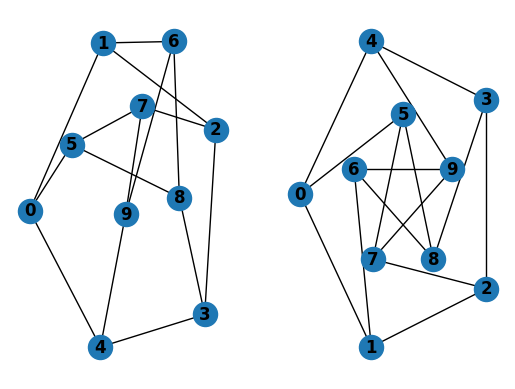

In [10]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


![Graph](https://www.geeksforgeeks.org/wp-content/uploads/Fig-11.jpg)

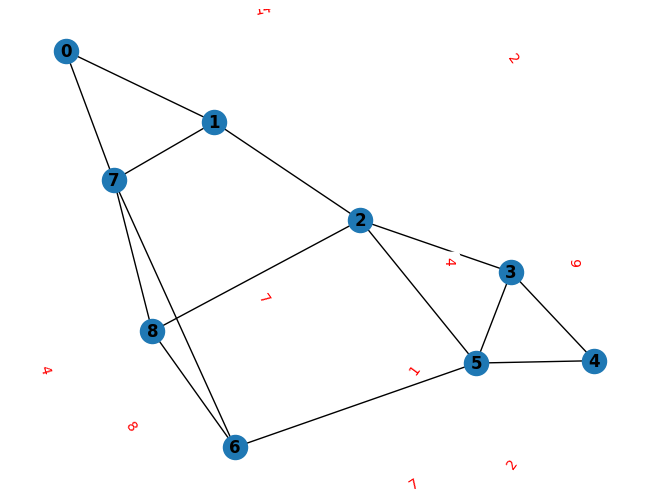

In [11]:
G = nx.Graph()
G.add_weighted_edges_from([(0,1,4),(0,7,8),(2,8,2),
                           (7,6,1),(8,6,6),
                           (6,5,2),(5,4,10),(7,8,7),
                           (7,1,11),(1,2,8),(2,3,7),(2,5,4),(3,5,14),(4,3,9)])
pos=nx.shell_layout(G)
nx.draw(G, with_labels=True, font_weight='bold') 
edge_labels = nx.get_edge_attributes(G,'weight') # key is edge, pls check for your case
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} # use this to modify the tuple keyed dict if it has > 2 elements, else ignore
out = nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red')

In [ ]:
type(out)

dict

In [12]:
length, path = nx.single_source_dijkstra(G, 0)

In [ ]:
type(length)

dict

In [13]:
length

{0: 0, 1: 4, 7: 8, 6: 9, 5: 11, 2: 12, 8: 14, 3: 19, 4: 21}